In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
!pip install tensorflow
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_data(csv):
    dataset = pd.read_csv(csv)
    return dataset
csv = 'my_paypal_creditcard.csv'
dataset = get_data(csv)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
def print_summarize_dataset(data_set):
    """This function prints out the dimension, first 10 rows, and the statistical summary of the boston housing prices data"""
    
    # print the data dimension
    print("Dataset dimension:")
    print(dataset.shape)
    print()
   
    # print the first 10 rows
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print()

    # print the summary statistics
    print("Statistical summary:")
    print(dataset.describe())

# Assuming you have a dataset named 'dataset' containing the boston housing prices data
print_summarize_dataset(dataset)

Dataset dimension:
(284807, 31)

First 10 rows of dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22   

In [4]:
def data_info(dataset):
    """this function inspects the data set"""
    
    # checking the data type and null values 
    print("Dataset information:")
    dataset.info()
data_info(dataset)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

### Exploratory Data Analysis

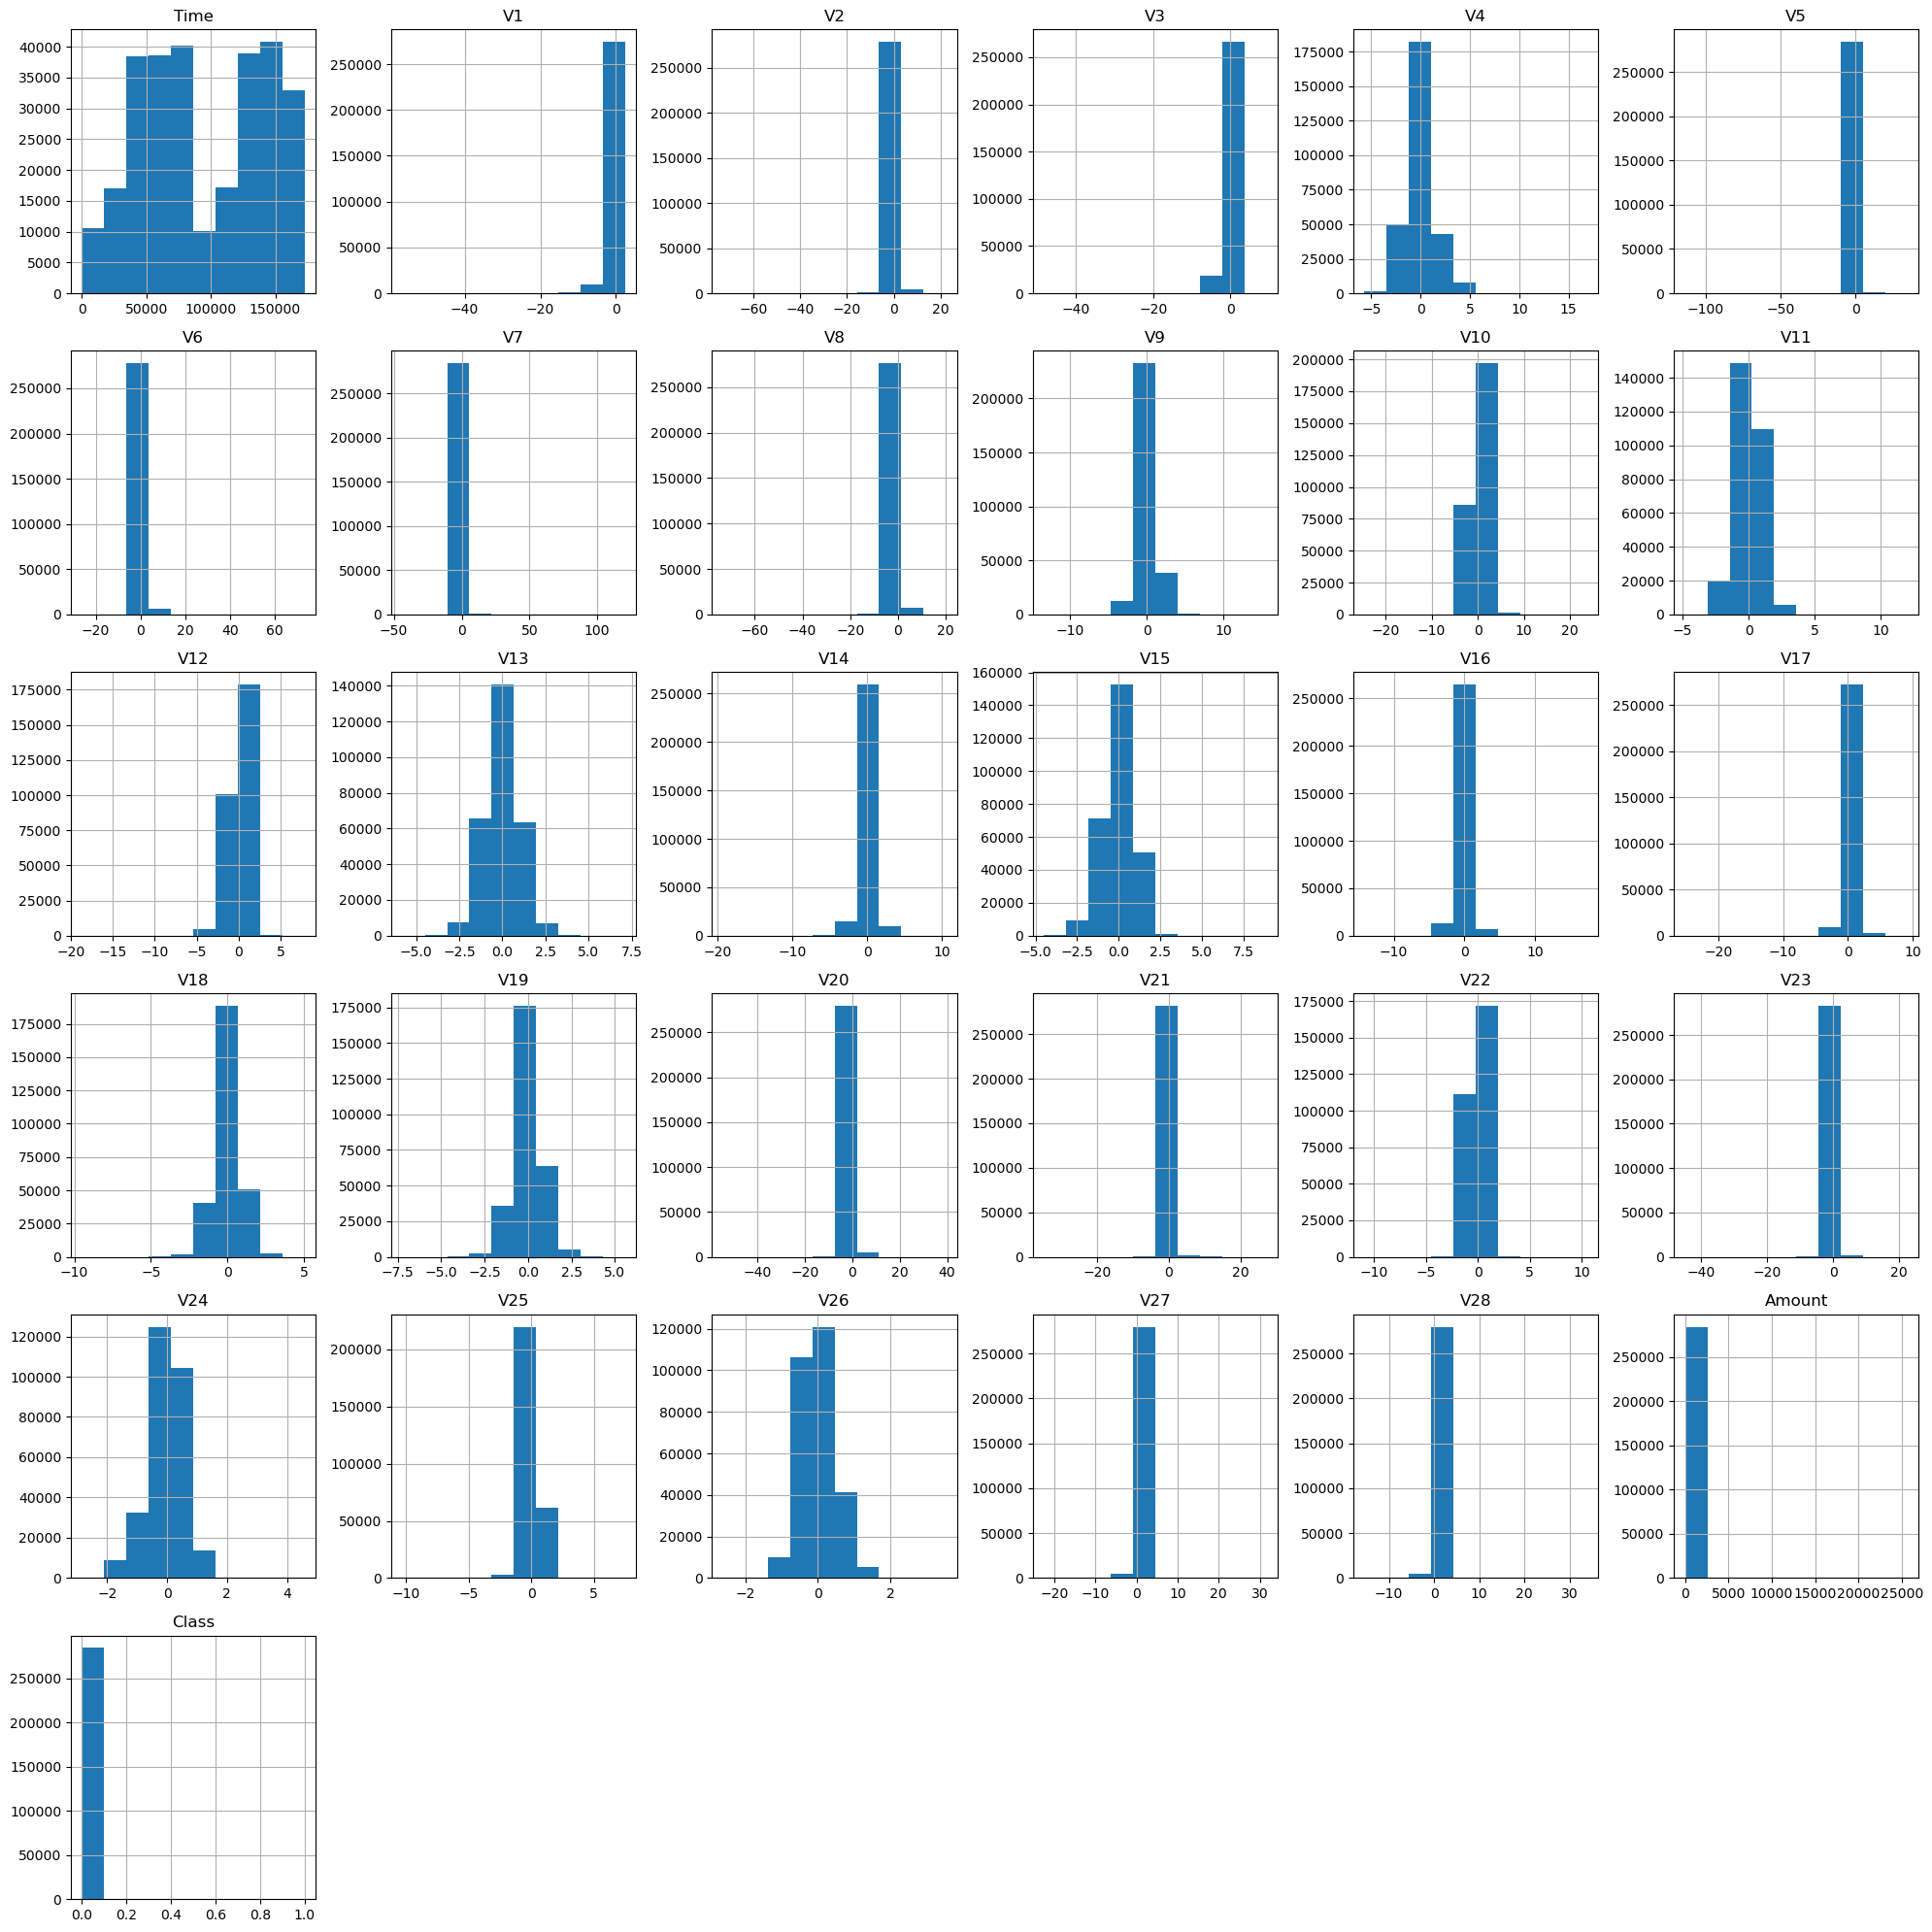

In [5]:
def print_histograms(data):
    """This function prints the histogram distribution of the numeric variables in the dataset."""
    data.hist(figsize=(20, 20))  # Adjust the figure size as needed
    plt.tight_layout()
    plt.show()
    
print_histograms(dataset)

In [6]:
def compute_correlations_matrix(data):
    
    # Compute the correlation matrix
    correlation_matrix = data.corr()
    
    return correlation_matrix
data_correl = compute_correlations_matrix(dataset)
data_correl

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


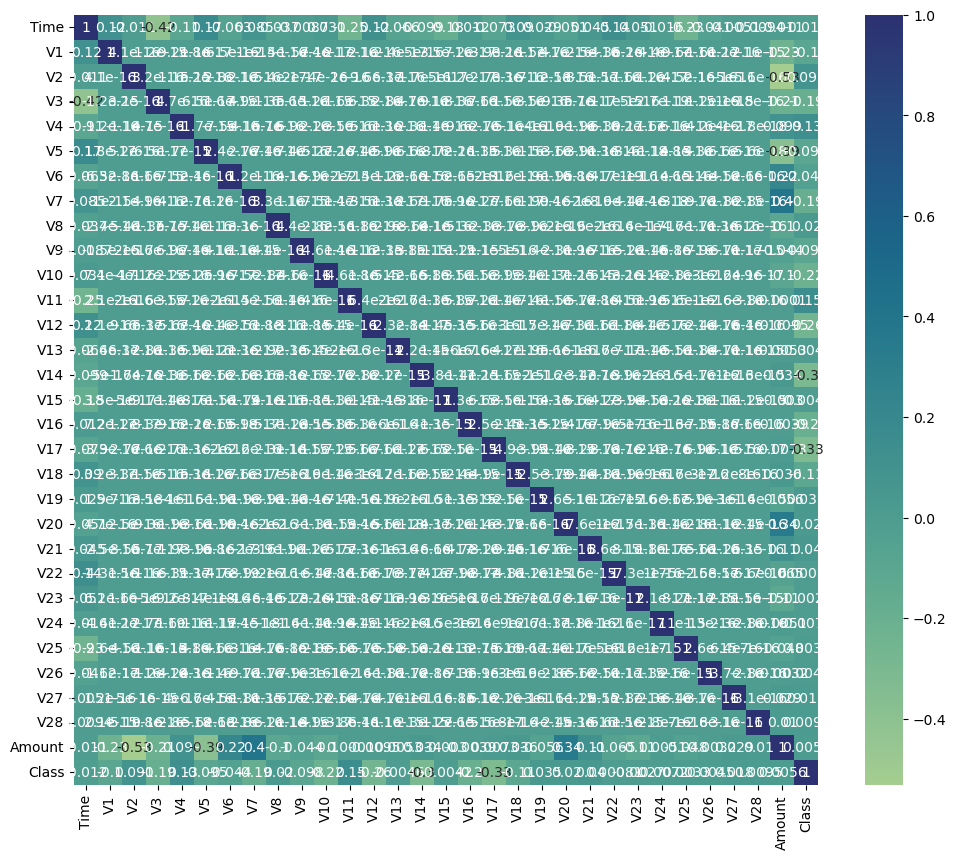

In [7]:
# plot a heat map to visualize the correlation matrix
plt.figure(figsize=(12,10))
sb.heatmap(data_correl, annot=True, cmap='crest');

#### Class Distribution

In [8]:
#Replace 1 with 'Fraud' and 0 with 'Valid' in the 'Class' column
dataset['Class'] = dataset['Class'].map({0: 'Valid', 1: 'Fraud'})

# Count the number of Fraudulent and Valid transactions
fraud_count = (dataset['Class'] == 'Fraud').sum()
valid_count = (dataset['Class'] == 'Valid').sum()

print('Number of Fraudulent transactions:', fraud_count)
print('Number of Valid transactions:', valid_count)

Number of Fraudulent transactions: 492
Number of Valid transactions: 284315


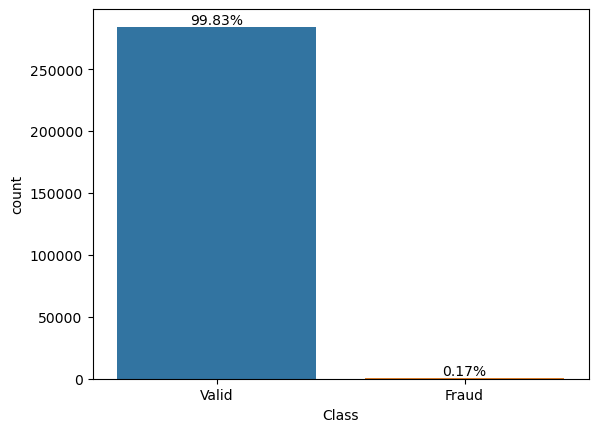

In [9]:
sb.countplot(data=dataset, x='Class')

# Get the count of each class
value_counts = dataset['Class'].value_counts()

# Calculate the percentage of each class
total = value_counts.sum()
percentages = [(count / total) * 100 for count in value_counts]

# Annotate the bars with the percentage values
for i, count in enumerate(value_counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

### Data Pre-processing
#### * Standardizing The Time and amount with standard scaler

            Time    Amount
0      -1.996583  0.244964
1      -1.996583 -0.342475
2      -1.996562  1.160686
3      -1.996562  0.140534
4      -1.996541 -0.073403
...          ...       ...
284802  1.641931 -0.350151
284803  1.641952 -0.254117
284804  1.641974 -0.081839
284805  1.641974 -0.313249
284806  1.642058  0.514355

[284807 rows x 2 columns]

Scaled Features Statistical Summary:
               Time        Amount
count  2.848070e+05  2.848070e+05
mean  -1.050379e-14  3.202236e-16
std    1.000002e+00  1.000002e+00
min   -1.996583e+00 -3.532294e-01
25%   -8.552120e-01 -3.308401e-01
50%   -2.131453e-01 -2.652715e-01
75%    9.372174e-01 -4.471707e-02
max    1.642058e+00  1.023622e+02


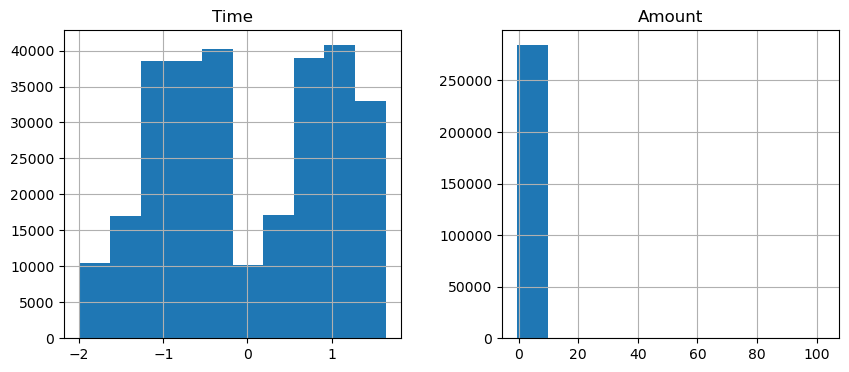

In [10]:
# Extracting numerical features for scaling
numerical_features = dataset[['Time', 'Amount']]

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Create a new dataframe with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['Time', 'Amount'])
dataset[['Time', 'Amount']] = scaled_df
# Display the scaled features
print(scaled_df)

# Display statistical summary of the scaled features
print('\nScaled Features Statistical Summary:')
print(scaled_df.describe())

# Plot histograms of the numerical features after scaling
scaled_df.hist(figsize=(10, 4))
plt.show()


#### * Balance the Class Label By Upsampling the minority class

upsampled_data dimension:
(568630, 31)

upsampled_data class counts
Valid    284315
Fraud    284315
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

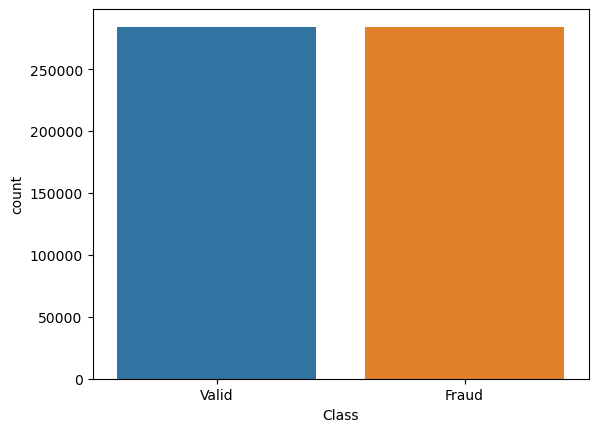

In [11]:
from sklearn.utils import resample

# Create two different dataframes for the minority and majority class
df_minor = dataset[dataset['Class'] == 'Fraud']  
df_major = dataset[dataset['Class'] == 'Valid']  
# Upsample minority class
df_minor_upsampled = resample(df_minor, replace=True, n_samples=len(df_major), random_state=0)

# Combine upsampled minority class with majority class
upsampled_data = pd.concat([df_major, df_minor_upsampled])

print("upsampled_data dimension:")
print(upsampled_data.shape)
print()

print('upsampled_data class counts')  
print(upsampled_data['Class'].value_counts())
sb.countplot(upsampled_data['Class'])

### Build the ML models

#### * Split the Data into training and test set

In [12]:
upsampled_data['Class'] =  upsampled_data['Class'].map({'Valid': 0, 'Fraud': 1})

X = upsampled_data.drop(['Class'], axis = 1)
y = upsampled_data['Class'] 

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set dimension:{X_train.shape}')
print(f'Test set dimension:{X_test.shape}')

Training set dimension:(454904, 30)
Test set dimension:(113726, 30)


#### * Initialize the Logistic Regression Classifier

In [13]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)  
print('Accuracy score:', acc)

#Evaluate the model performance
from sklearn.metrics import classification_report , accuracy_score
print("Classification report : \n",classification_report(y_test,y_pred))

Accuracy score: 0.9513919420361219
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56746
           1       0.98      0.92      0.95     56980

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



#### Visualise the Logistic Regression Performance

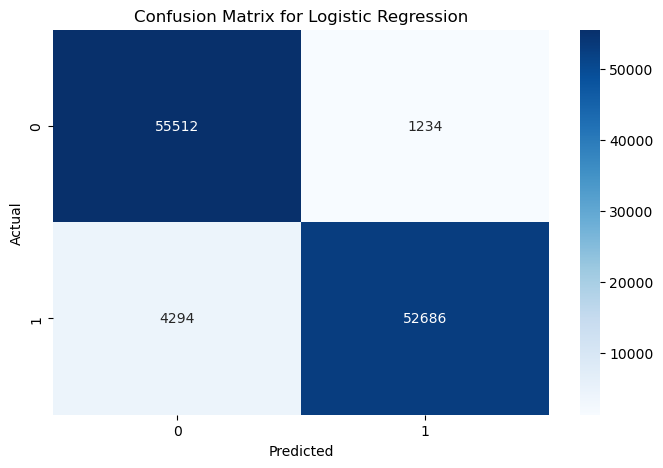

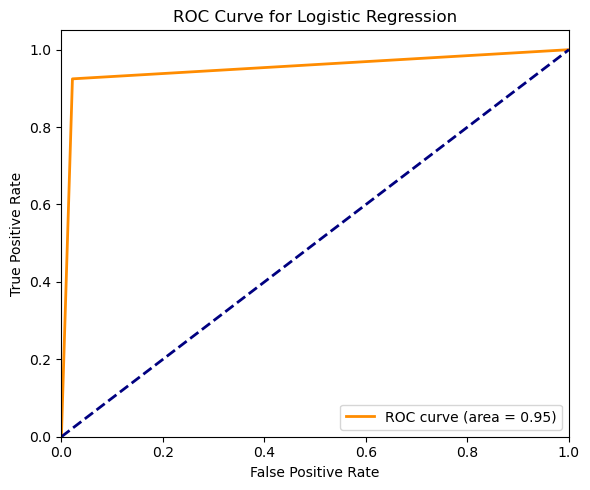

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
 
# Confusion Matrix
plt.figure(figsize=(8, 5))
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### Bulid A Neural Network For Fraud Detection

* Specify model architecture

In [15]:
from tensorflow.keras.models import Sequential
from keras.layers import InputLayer, Dense

# Specify model architecture
model = Sequential()
model.add(InputLayer(input_shape = (X_train.shape[1],)))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#sumarrise mode
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Compile and train the model

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10


14216/14216 [==============================] - 55s 4ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 2/10
14216/14216 [==============================] - 50s 4ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0079 - val_accuracy: 0.9981
Epoch 3/10
14216/14216 [==============================] - 50s 4ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 4/10
14216/14216 [==============================] - 52s 4ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0095 - val_accuracy: 0.9961
Epoch 5/10
14216/14216 [==============================] - 49s 3ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 6/10
14216/14216 [==============================] - 52s 4ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 7/10
14216/14216 [==============================] - 51s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss

* Evaluating model performance on validation set

In [17]:
#getting prediction for the validation set
predictions_probabilities = model.predict(X_test)

# Converting probabilities to binary predictions
predictions = (predictions_probabilities > 0.5).astype("int32")

#Evaluate the accuracy score
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

3554/3554 [==============================] - 8s 2ms/step
Accuracy: 0.9995163814782899


####  Visualising The Neural Network Model performance

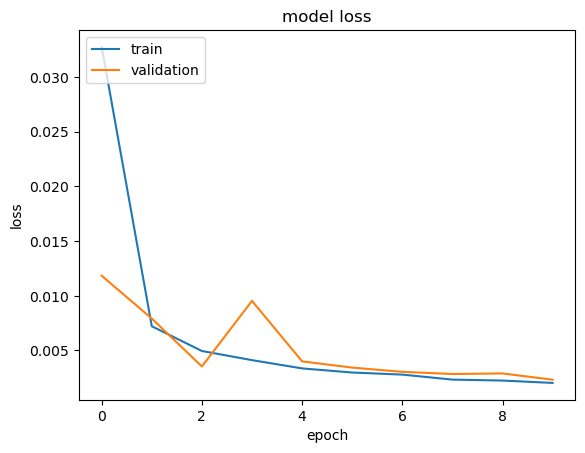

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

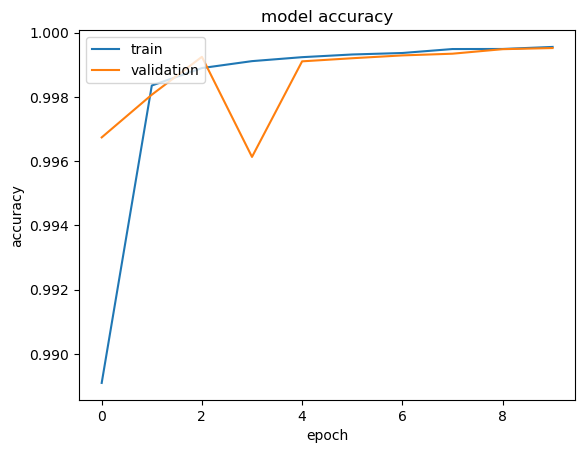

In [19]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

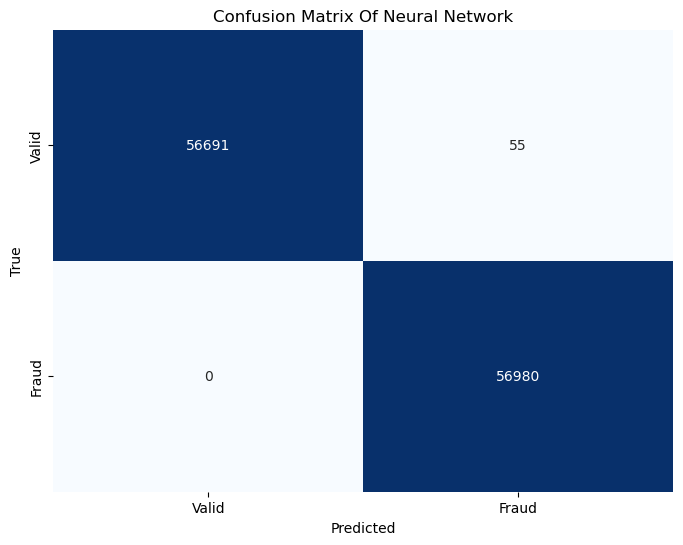

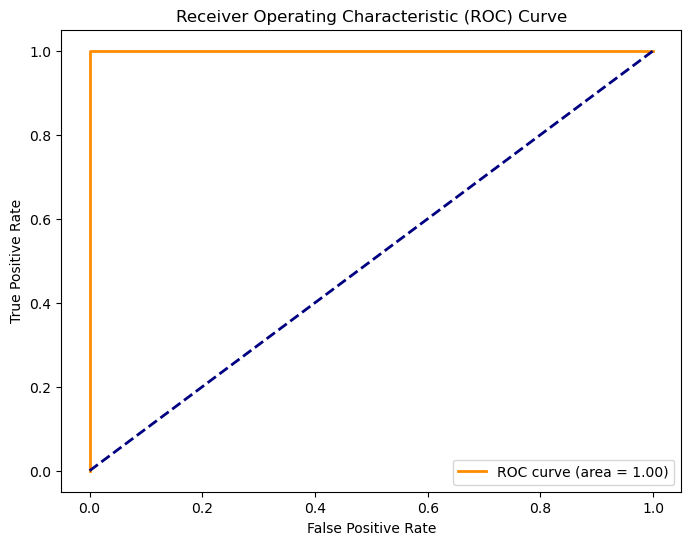

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.title('Confusion Matrix Of Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, predictions_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Saving the models for Deploymaent

* Save the Logistic Regression Model

In [21]:
from joblib import dump

dump(classifier, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

* Save Neural Network Model (using TensorFlow/Keras):

In [22]:
# Save the entire model, including architecture, optimizer, and learned weights
model.save('neural_network_model.h5')